<a href="https://colab.research.google.com/github/slapazromero/EjercicioKNN_Boston/blob/main/Ejercicios_KNN_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de librerías necesarias.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Preproceso.

## Importacion de los datos del dataset.

In [2]:
boston_housing = pd.read_csv('BostonHousing.csv')

## Mostrar las primeras y ultimas filas del dataframe importado.

In [3]:
boston_housing.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
boston_housing.tail()

,RM,LSTAT,PTRATIO,MEDV
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0
488,6.030,7.88,21.0,249900.0


## Modificaciones de los datos.

## Mostrar las primeras y ultimas filas del dataframe modificado.

In [5]:
boston_housing.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [6]:
boston_housing.tail()

,RM,LSTAT,PTRATIO,MEDV
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0
488,6.030,7.88,21.0,249900.0


## Mostrar parámetros estadísticos de los datos (media, desviación típica, cuartiles, etc.)

In [7]:
boston_housing.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


## Mostrar un mapa de calor que indique la correlación entre variables.

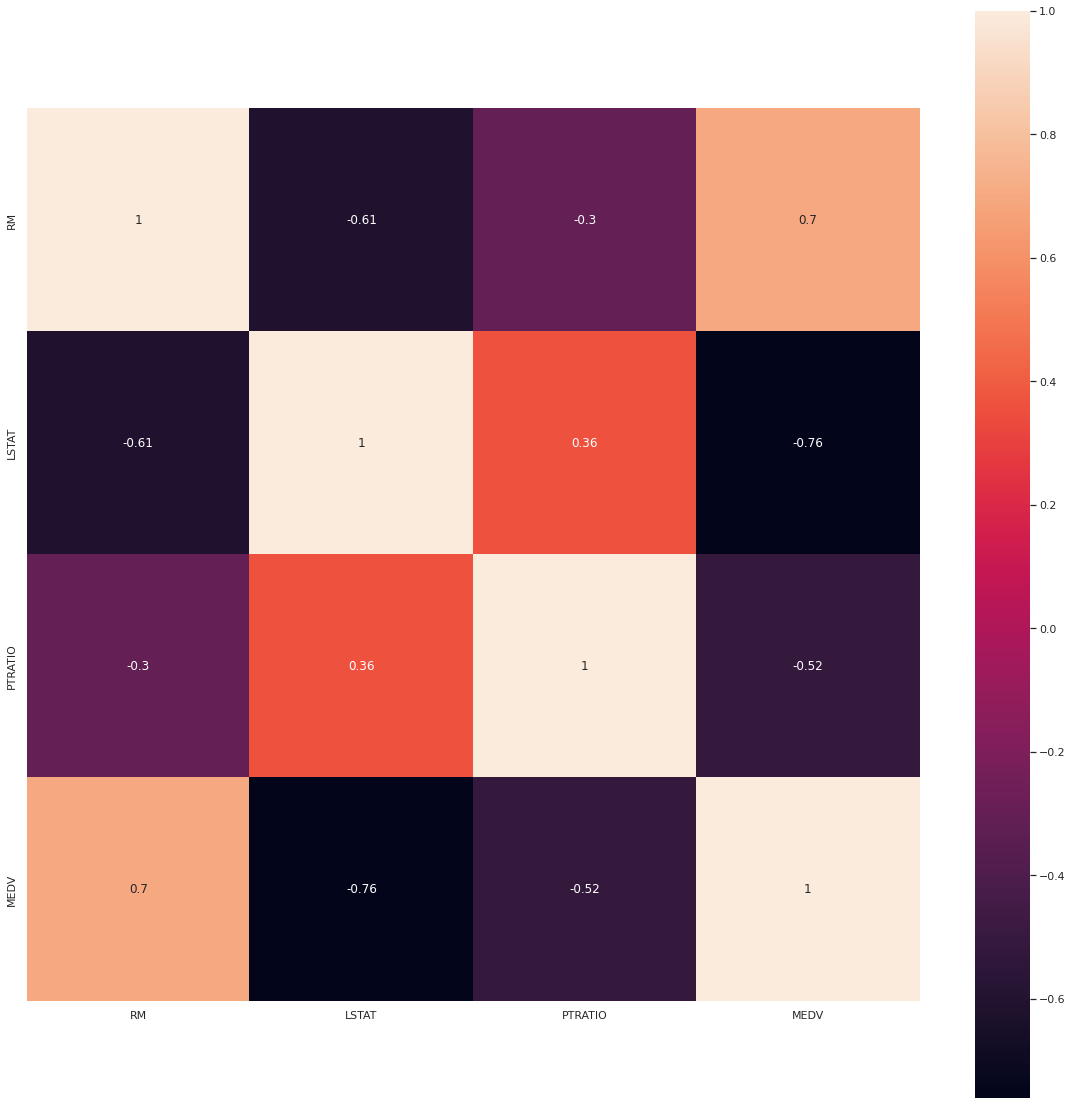

In [8]:
sns.set(rc = {'figure.figsize':(20, 20)})
sns.heatmap(boston_housing.corr(), square=True, annot=True)

## Seleccionar las características a tener en cuenta en el estudio.

In [9]:
caracteristicas = ['LSTAT', 'PTRATIO', 'RM']
resultado = ['MEDV']

## Separar datos entre datos de entrada y etiquetas (resultados).

In [10]:
x_boston_housing = boston_housing[caracteristicas]
y_boston_housing = boston_housing[resultado]

## Separar datos entre entrenamiento y prueba (usando un 75% para entrenamiento y 25% para test)


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_boston_housing, y_boston_housing, test_size=0.25)

# Modelo KNeighborsRegressor

## Optimización de hiperparámetros.

### Validación cruzada.

In [12]:
def validacion_cruzada(index, x_train, y_train, weights):
  kf = KFold(n_splits=5)

  model = KNeighborsRegressor(index, weights=weights)
  scores = []

  for train_fold, test_fold in kf.split(x_train):
    model.fit(x_train.values[train_fold], y_train.values[train_fold].ravel())
    y_predict = model.predict(x_train.values[test_fold])
    scores.append(mean_absolute_error(y_train.values[test_fold], y_predict))
  return np.mean(scores)


In [13]:
resultados = []
for i in range(2):
  for j in range(1, 31):
    if i == 0:
      resultados.append((validacion_cruzada(j, x_train, y_train, 'uniform'), j, 'uniform'))
    elif i == 1:
      resultados.append((validacion_cruzada(j, x_train, y_train, 'distance'), j, 'distance'))

mejor_resultado = min(resultados)
print(mejor_resultado)

(58659.41784117436, 15, 'distance')


## Entrenamiento y predicción.

### Elegir, instanciar y entrenar el modelo.

In [14]:
model = KNeighborsRegressor(mejor_resultado[1], weights=mejor_resultado[2])

### Realizar una predicción con los datos de prueba.

In [15]:
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=15, weights='distance')

In [16]:
y_predict = model.predict(x_test)

## Evaluación.

### Mostrar el error cuadrático medio

In [17]:
mean_squared_error(y_test, y_predict)

6708292211.783109

### Mostrar el error absoluto medio

In [18]:
mean_absolute_error(y_test, y_predict)

61886.69758815993

###  Representar gráficamente los valores predichos con los valores reales.

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


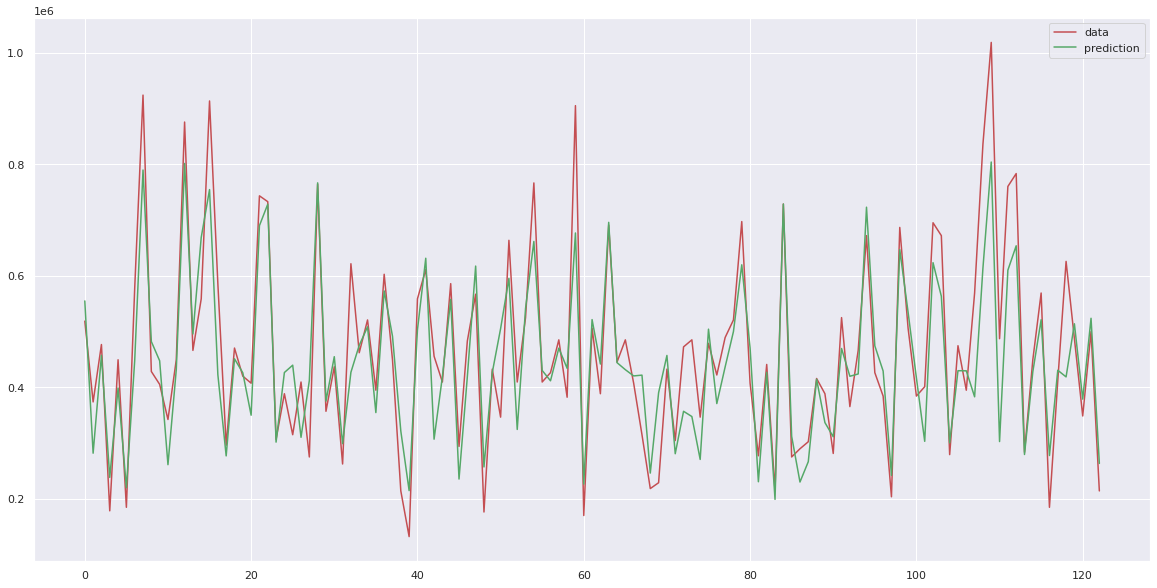

In [19]:
plt.figure(figsize=(20,10))
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
plt.plot(xx, y_predict, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.show()
